<a href="https://colab.research.google.com/github/gustavo-ifusp/alumni_usp_analytics/blob/main/alumni_evolucao_cadastros_notebook_unidade_usp_2021_odontologia_sao_paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import re
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

#**Alumni - Odontologia São Paulo.**<br>

**Relatório:** https://docs.google.com/document/d/1ayk2Trhf0rB8-6QF7qSnA_pK61oN-UcooWfW_Rx30U4/edit?usp=sharing

Atualização: 08/12/2021 <br>

Responsável: Gustavo de Andrade<br>
gustavo@if.usp.br
<br>


#**O primeiro dataframe é do "Acesso à plafatorma - Primeiro Acesso"**

In [40]:
dados = pd.read_csv("Dashboard Alumni USP_Primeiro Acesso_Tabela dinâmica.csv")

In [41]:
dados

,Y,M,D,login_status,genre,Record Count
0,2019,12,12,Complete,Female,1
1,2018,3,2,Complete,Female,1
2,2018,8,29,Complete,Male,9
3,2017,1,7,Complete,Female,1
4,2016,10,27,Incomplete,Female,3
...,...,...,...,...,...,...
1203,2021,8,2,Complete,Female,1
1204,2021,8,3,Complete,Female,1
1205,2021,8,23,Complete,Male,1
1206,2021,11,5,Complete,Female,1


In [42]:
dados1 = pd.DataFrame()
dados1['anos'] = dados['Y']
dados1['total'] = dados['Record Count']

In [43]:
dados1

,anos,total
0,2019,1
1,2018,1
2,2018,9
3,2017,1
4,2016,3
...,...,...
1203,2021,1
1204,2021,1
1205,2021,1
1206,2021,1


In [44]:
evol = pd.DataFrame()
evol['total'] = dados.groupby(['Y'], as_index = True )['Record Count'].sum()
evol = pd.DataFrame(evol)
evol

,total
Y,
2016,150
2017,350
2018,326
2019,283
2020,403
2021,274


In [113]:
evol = pd.DataFrame([[150],[500],[826],[1109],[1512],[1786]], columns=['Total'], index=["2016", "2017","2018","2019","2020","2021"])
evol

,Total
2016,150
2017,500
2018,826
2019,1109
2020,1512
2021,1786


Text(0.5, 1.0, 'Inscritros no ALUMNI - Odontologia - São Paulo')

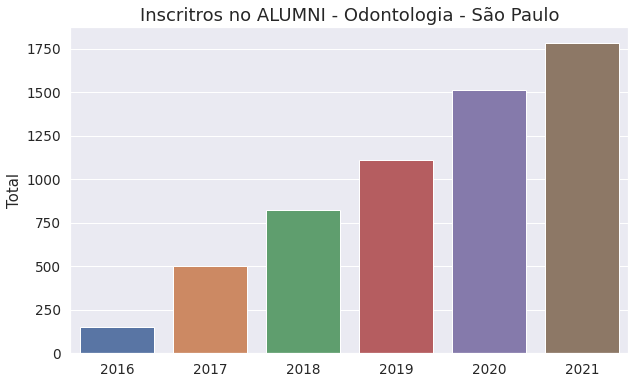

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(data=evol, x=evol.index, y='Total')
plt.title('Inscritros no ALUMNI - Odontologia - São Paulo', fontsize=18)

Text(0.5, 1.0, 'Inscritros no ALUMNI - Odontologia - São Paulo')

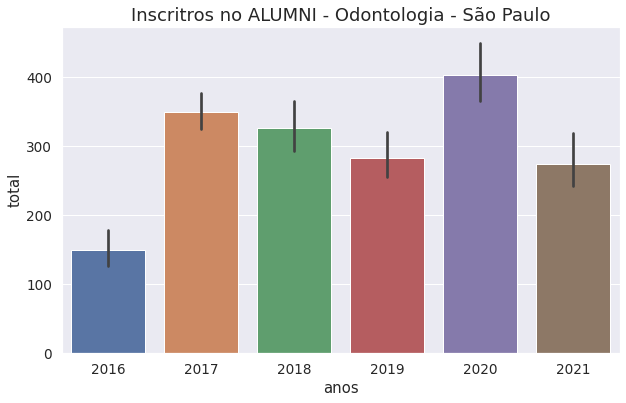

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dados1, x='anos', y='total', estimator=sum)
plt.title('Inscritros no ALUMNI - Odontologia - São Paulo', fontsize=18)

In [48]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Y             1208 non-null   int64 
 1   M             1208 non-null   int64 
 2   D             1208 non-null   int64 
 3   login_status  1208 non-null   object
 4   genre         1208 non-null   object
 5   Record Count  1208 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 56.8+ KB


In [49]:
n = 0
data_e_hora_em_texto = str(dados['Y'][n]) + '-' + str(dados['M'][n]) +  '-' + str(dados['D'][n])

In [50]:
data_e_hora_em_texto

'2019-12-12'

In [51]:
n = 0    
lista = []
while n < len(dados):
    lista_insert = str(dados['Y'][n]) + '-' + str(dados['M'][n]) +  '-' + str(dados['D'][n])
    lista.insert(n, lista_insert)
    n += 1

In [52]:
dados['data'] = lista

In [53]:
dados['data'] = dados['data'].astype('datetime64[ns]')
dados

,Y,M,D,login_status,genre,Record Count,data
0,2019,12,12,Complete,Female,1,2019-12-12
1,2018,3,2,Complete,Female,1,2018-03-02
2,2018,8,29,Complete,Male,9,2018-08-29
3,2017,1,7,Complete,Female,1,2017-01-07
4,2016,10,27,Incomplete,Female,3,2016-10-27
...,...,...,...,...,...,...,...
1203,2021,8,2,Complete,Female,1,2021-08-02
1204,2021,8,3,Complete,Female,1,2021-08-03
1205,2021,8,23,Complete,Male,1,2021-08-23
1206,2021,11,5,Complete,Female,1,2021-11-05


In [54]:
data_dados = pd.DataFrame()
data_dados

""


In [55]:
data_dados['total'] = dados.groupby(['data'])['Record Count'].sum()
data_dados

,total
data,
2016-09-16,1
2016-09-20,1
2016-10-05,1
2016-10-11,2
2016-10-12,4
...,...
2021-11-23,4
2021-11-28,1
2021-11-30,1


In [56]:
fig = px.area(dados, facet_col="genre",  x='data', y='Record Count')
fig.update_layout(bargap=0.1)
fig.show()

In [57]:
fig = px.area(dados, x='data', y='Record Count')
fig.show()

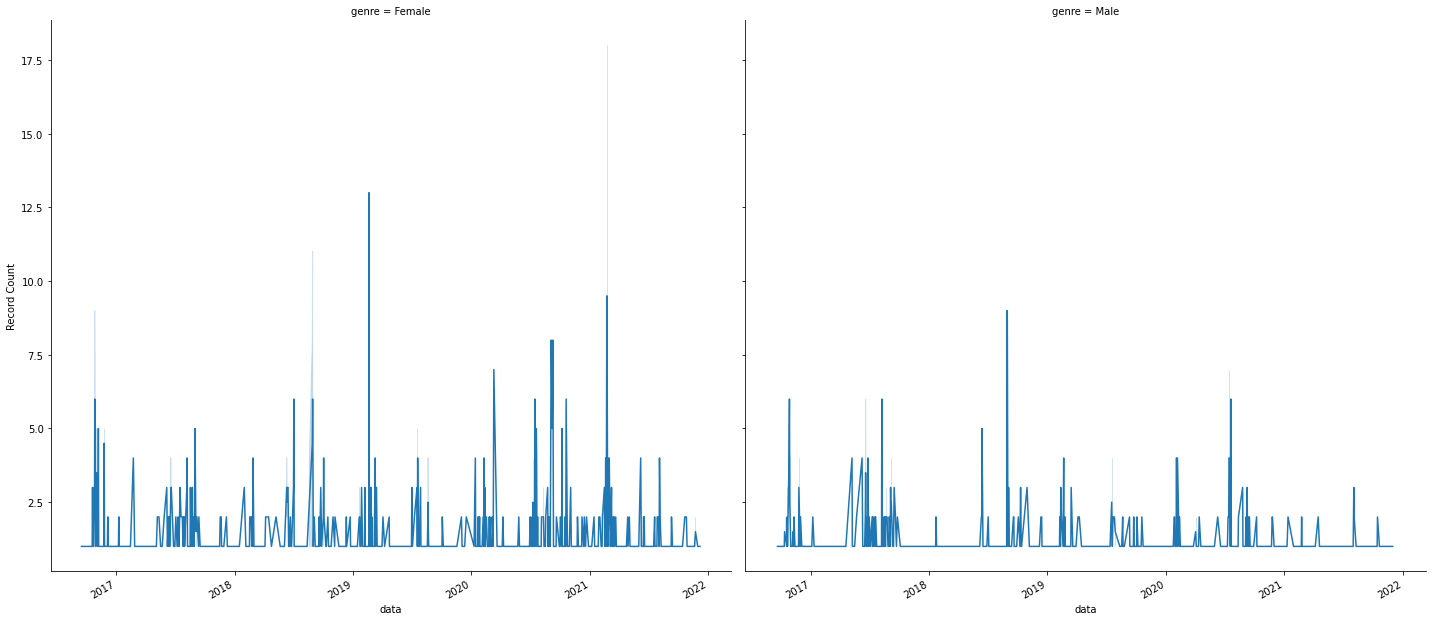

In [58]:
g = sns.relplot(x="data", y="Record Count", kind="line", data=dados, col="genre", height=10)
g.figure.autofmt_xdate()

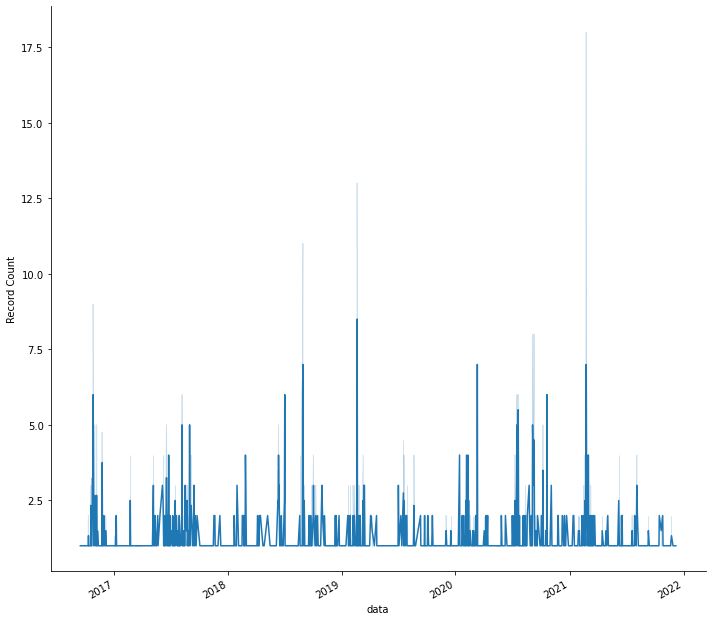

In [59]:
g = sns.relplot(x="data", y="Record Count", kind="line", data=dados, height=10)
g.figure.autofmt_xdate()

In [60]:
dados['mes_ano'] = dados['data'].map(lambda x: 100*x.year + x.month)
dados_mes = dados.groupby(['mes_ano'])['Record Count'].sum().reset_index()

In [61]:
dados

,Y,M,D,login_status,genre,Record Count,data,mes_ano
0,2019,12,12,Complete,Female,1,2019-12-12,201912
1,2018,3,2,Complete,Female,1,2018-03-02,201803
2,2018,8,29,Complete,Male,9,2018-08-29,201808
3,2017,1,7,Complete,Female,1,2017-01-07,201701
4,2016,10,27,Incomplete,Female,3,2016-10-27,201610
...,...,...,...,...,...,...,...,...
1203,2021,8,2,Complete,Female,1,2021-08-02,202108
1204,2021,8,3,Complete,Female,1,2021-08-03,202108
1205,2021,8,23,Complete,Male,1,2021-08-23,202108
1206,2021,11,5,Complete,Female,1,2021-11-05,202111


In [62]:
dados_mes = dados_mes.append(dados_mes)

In [63]:
dados_mes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mes_ano       128 non-null    int64
 1   Record Count  128 non-null    int64
dtypes: int64(2)
memory usage: 3.0 KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

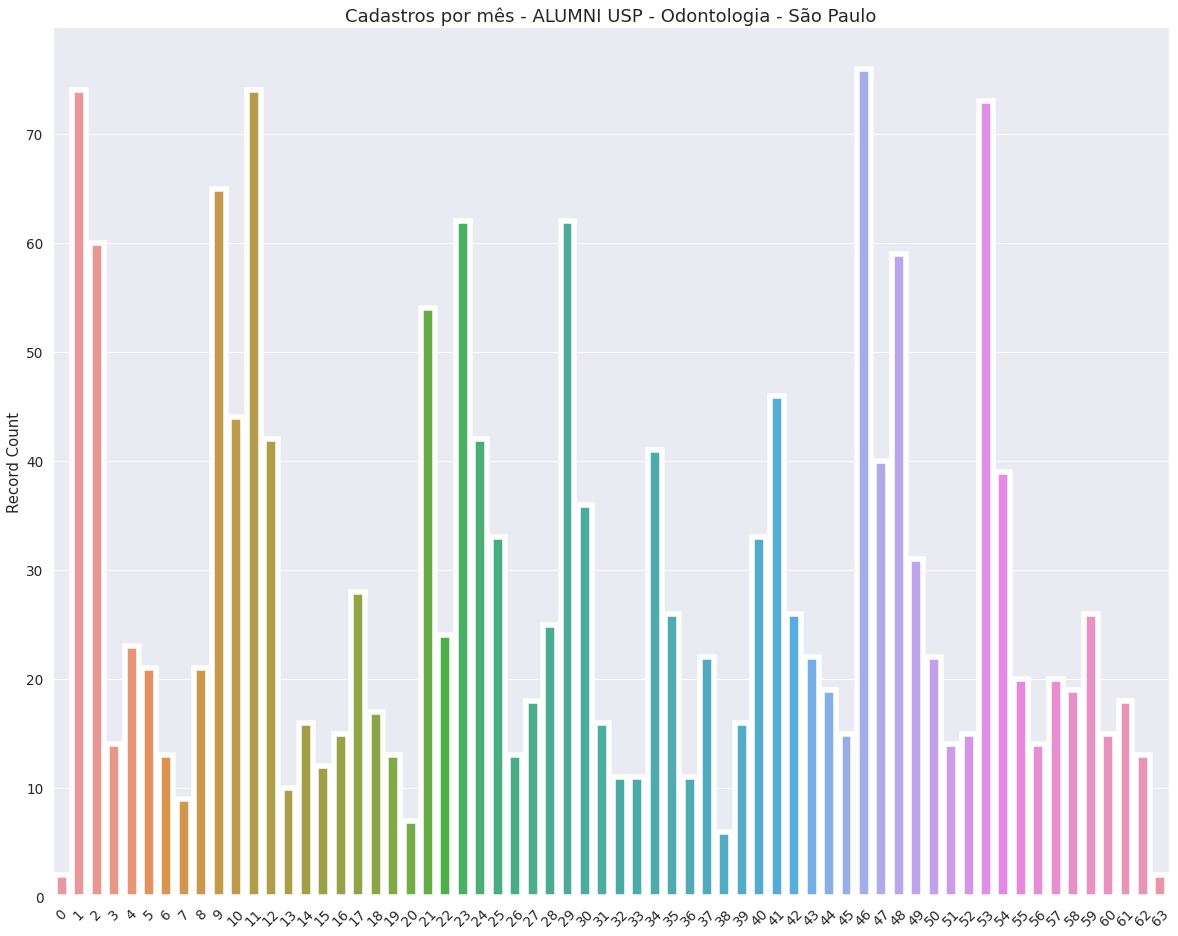

In [120]:
plt.figure(figsize=(20,16))
sns.barplot(data=dados_mes, x=dados_mes.mes_ano.index, y='Record Count',
                 linewidth=5.5)
plt.title('Cadastros por mês - ALUMNI USP - Odontologia - São Paulo', fontsize=18)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

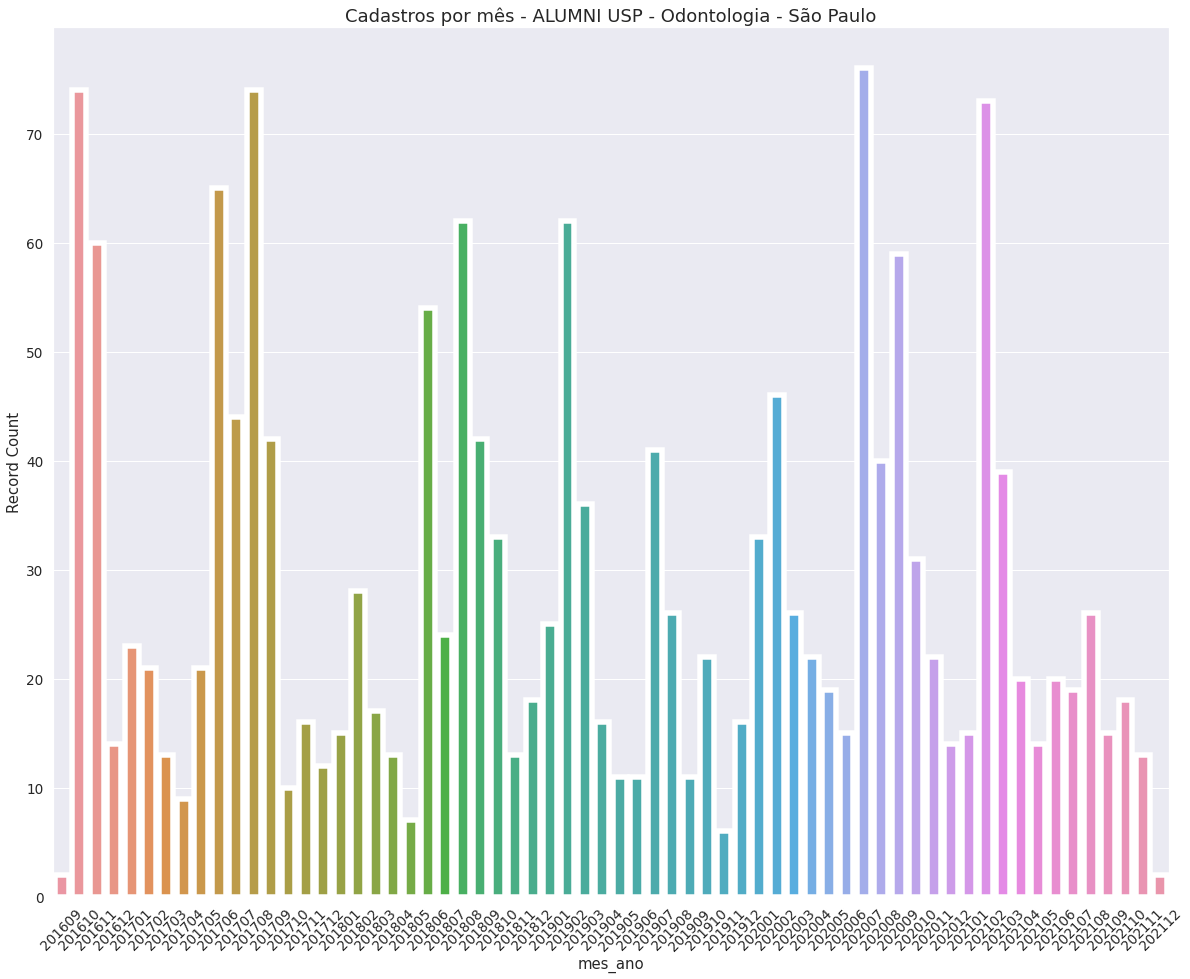

In [121]:
plt.figure(figsize=(20,16))
sns.barplot(data=dados_mes, x=dados_mes.mes_ano, y='Record Count',
                 linewidth=5.5)
plt.title('Cadastros por mês - ALUMNI USP - Odontologia - São Paulo', fontsize=18)
plt.xticks(rotation=45)

In [65]:
login_status_estat = dados.groupby(['login_status'])['Record Count'].sum()
login_status_estat 

login_status
Complete      1642
Incomplete     144
Name: Record Count, dtype: int64

(-1.1076996185846364,
 1.1025696866986567,
 -1.1075365434838875,
 1.100358891315668)

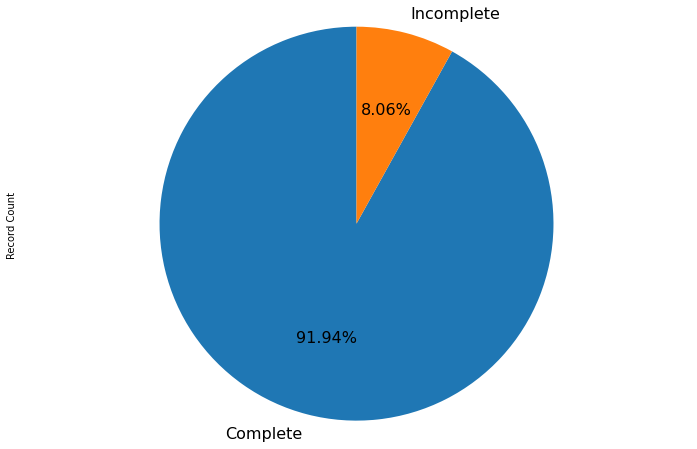

In [66]:
fig = plt.figure(figsize=(12, 8))
login_status_estat.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [67]:
group_record_count_y = dados.groupby(['Y'])['Record Count'].sum()

In [68]:
group_record_count_y

Y
2016    150
2017    350
2018    326
2019    283
2020    403
2021    274
Name: Record Count, dtype: int64

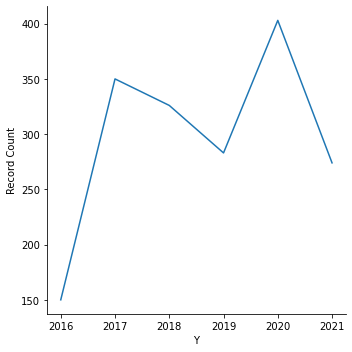

In [69]:
sns.relplot( ci="sd", kind="line", data=group_record_count_y);

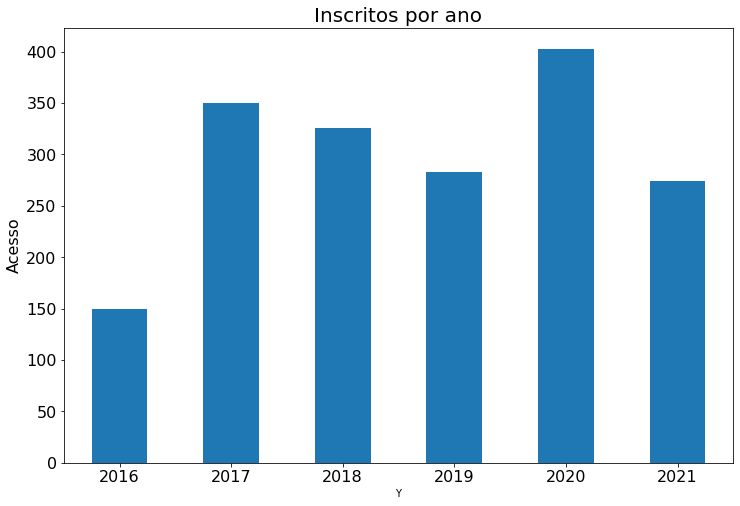

In [70]:
plt.figure(figsize=(12, 8))
group_record_count_y.plot(kind='bar')
plt.title('Inscritos por ano', fontsize=20)
plt.ylabel('Acesso', fontsize=16)
plt.tick_params(labelsize=16)
plt.xticks(rotation=0)
plt.show()

#**O segundo dataframe é do "Acessos à plafatorma - Abrangência"**

In [71]:
dados2 = pd.read_csv("Dashboard Alumni USP_Acesso - Abrangência_Tabela.csv")

In [72]:
dados2

,institution,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,Faculdade de Odontologia,6934,5148,1786,0.257571,1642,0.919373


In [73]:
ranking_inscritos = pd.DataFrame()
ranking_inscritos['unidades'] = dados2['institution']
ranking_inscritos['total'] = dados2['is_active']
ranking_inscritos = ranking_inscritos.sort_values(['total'],ascending=False)
ranking_inscritos

,unidades,total
0,Faculdade de Odontologia,1786


In [74]:
inscritos_alumni = ranking_inscritos['total'].sum() 
inscritos_alumni

1786

Total verificado! corresponde perfeito!

Filtrando

In [75]:
ranking_inscritos_abs_top = ranking_inscritos[:10] 
ranking_inscritos_abs_top.to_excel('ranking_inscritos_abs_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_abs_top

,unidades,total
0,Faculdade de Odontologia,1786


**Total de formados nas ODONTOS**

In [76]:
formados_total = pd.DataFrame()
formados_total['unidades'] = dados2['institution']
formados_total['total'] = dados2['total_active_inactive']
formados_total = formados_total.sort_values(['total'],ascending=False)
formados_total

,unidades,total
0,Faculdade de Odontologia,6934


In [77]:
formados = formados_total['total'].sum() 
formados

6934

In [78]:
ranking_inscritos_rel = pd.DataFrame()
ranking_inscritos_rel['unidades'] = dados2['institution']
ranking_inscritos_rel['total'] = dados2['perc_active']
ranking_inscritos_rel = ranking_inscritos_rel.sort_values(['total'],ascending=False)
ranking_inscritos_rel

,unidades,total
0,Faculdade de Odontologia,0.257571


In [80]:
ranking_inscritos_rel_top = ranking_inscritos_rel[:10] 
ranking_inscritos_rel_top['total'] = ranking_inscritos_rel_top['total']*100
ranking_inscritos_rel_top.to_excel('ranking_inscritos_rel_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_rel_top

,unidades,total
0,Faculdade de Odontologia,25.757139


**Perfil completo ou incompleto - Total**

In [82]:
ranking_perfil_completo = pd.DataFrame()
ranking_perfil_completo['unidades'] = dados2['institution']
ranking_perfil_completo['total'] = dados2['is_complete']
ranking_perfil_completo = ranking_perfil_completo.sort_values(['total'],ascending=False)
ranking_perfil_completo

,unidades,total
0,Faculdade de Odontologia,1642


**Perfil completo ou incompleto - Relativo**

In [86]:
ranking_perfil_completo_rel = pd.DataFrame()
ranking_perfil_completo_rel['unidades'] = dados2['institution']
ranking_perfil_completo_rel['total'] = dados2['perc_complete']
ranking_perfil_completo_rel = ranking_perfil_completo_rel.sort_values(['total'],ascending=False)
ranking_perfil_completo_rel

,unidades,total
0,Faculdade de Odontologia,0.919373


#**O Terceiro DataFrame é:"Acessos à plafatorma - Demográfico"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [88]:
dados3_1 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela.csv")
dados3_2 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela dinâmica.csv")
dados3_3 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Gráfico de pizza.csv")

In [89]:
dados3_1

,periodstartyear,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,2019,18,10,8,0.444444,8,1.000000
1,2018,31,13,18,0.580645,18,1.000000
2,2017,50,22,28,0.560000,25,0.892857
3,2016,90,17,73,0.811111,72,0.986301
4,2015,177,52,125,0.706215,123,0.984000
5,2014,153,49,104,0.679739,100,0.961538
6,2013,138,53,85,0.615942,79,0.929412
7,2012,150,76,74,0.493333,70,0.945946
8,2011,170,90,80,0.470588,77,0.962500
9,2010,175,103,72,0.411429,68,0.944444


In [90]:
dados3_2

,age,Record Count,Record Count.1
0,Entre 41 e 50,484,0.270997
1,Entre 31 e 40,541,0.302912
2,Entre 51 e 60,275,0.153975
3,Entre 61 e 70,94,0.052632
4,Entre 26 e 30,295,0.165174
5,Entre 71 e 80,11,0.006159
6,Entre 21 e 25,86,0.048152


In [91]:
dados3_3

,genre,Record Count
0,Female,4190
1,Male,2744


#**O quinto DataFrame é: "Status Profissional"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [92]:
dados5 = pd.read_csv("Dashboard Alumni USP_Status Profissional_Tabela dinâmica.csv")

In [93]:
dados5

,prof_status,Y,Record Count
0,Sou Empregado ou Servidor Público,2019,199
1,Sou Empregado ou Servidor Público,2018,254
2,Sou Profissional Liberal,2017,26
3,Sou Empregado,2016,7
4,-,2017,207
...,...,...,...
71,Estou Procurando Emprego,2017,1
72,Sou Estudante com Bolsa,2021,8
73,Procuro meu Primeiro Emprego,2021,21
74,Procuro meu Primeiro Emprego,2019,15


In [94]:
prof_status_total = dados5.groupby(by="prof_status")['Record Count'].sum().sort_values(ascending=False)
prof_status_total

prof_status
Sou Empregado ou Servidor Público    671
Sou Profissional Liberal             271
-                                    257
Sou Empregado                         92
Procuro meu Primeiro Emprego          55
Sou Empreendedor                      45
Sou Servidor Público Estadual         44
Estou Procurando Emprego              40
Sou Estudante com Bolsa               39
Sou Servidor Público Municipal        36
Sou Servidor Público Federal          27
Sou Estudante                         23
Nenhuma das anteriores                22
Sou Pós-doutorando                    15
Estou Aposentado                       5
Name: Record Count, dtype: int64

In [95]:
dados5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prof_status   76 non-null     object
 1   Y             76 non-null     int64 
 2   Record Count  76 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


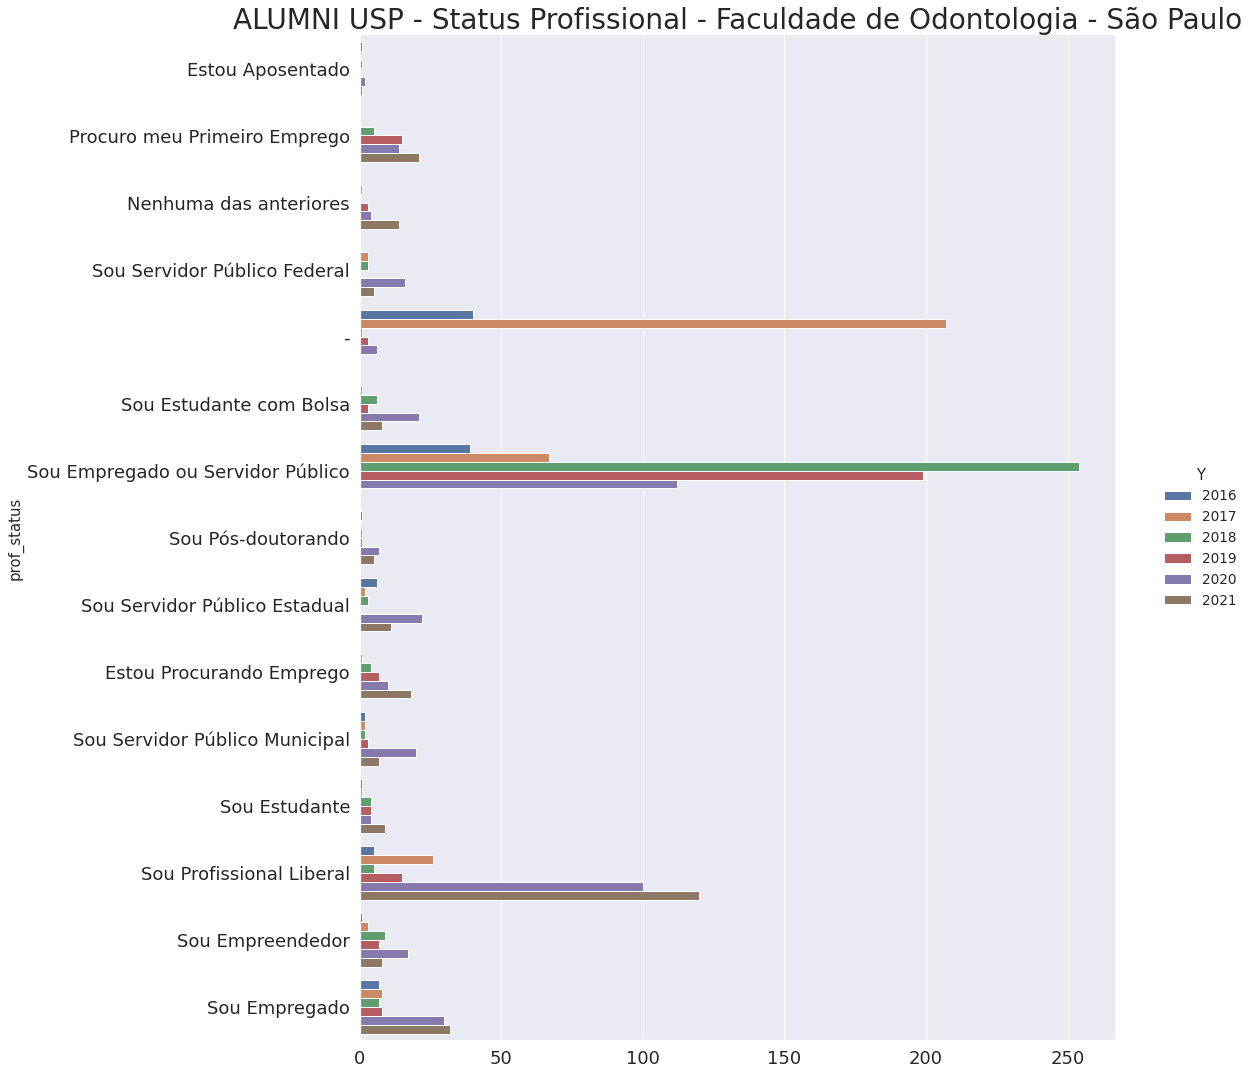

In [124]:
sns.catplot( y="prof_status", x="Record Count", hue="Y", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('ALUMNI USP - Status Profissional - Faculdade de Odontologia - São Paulo', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

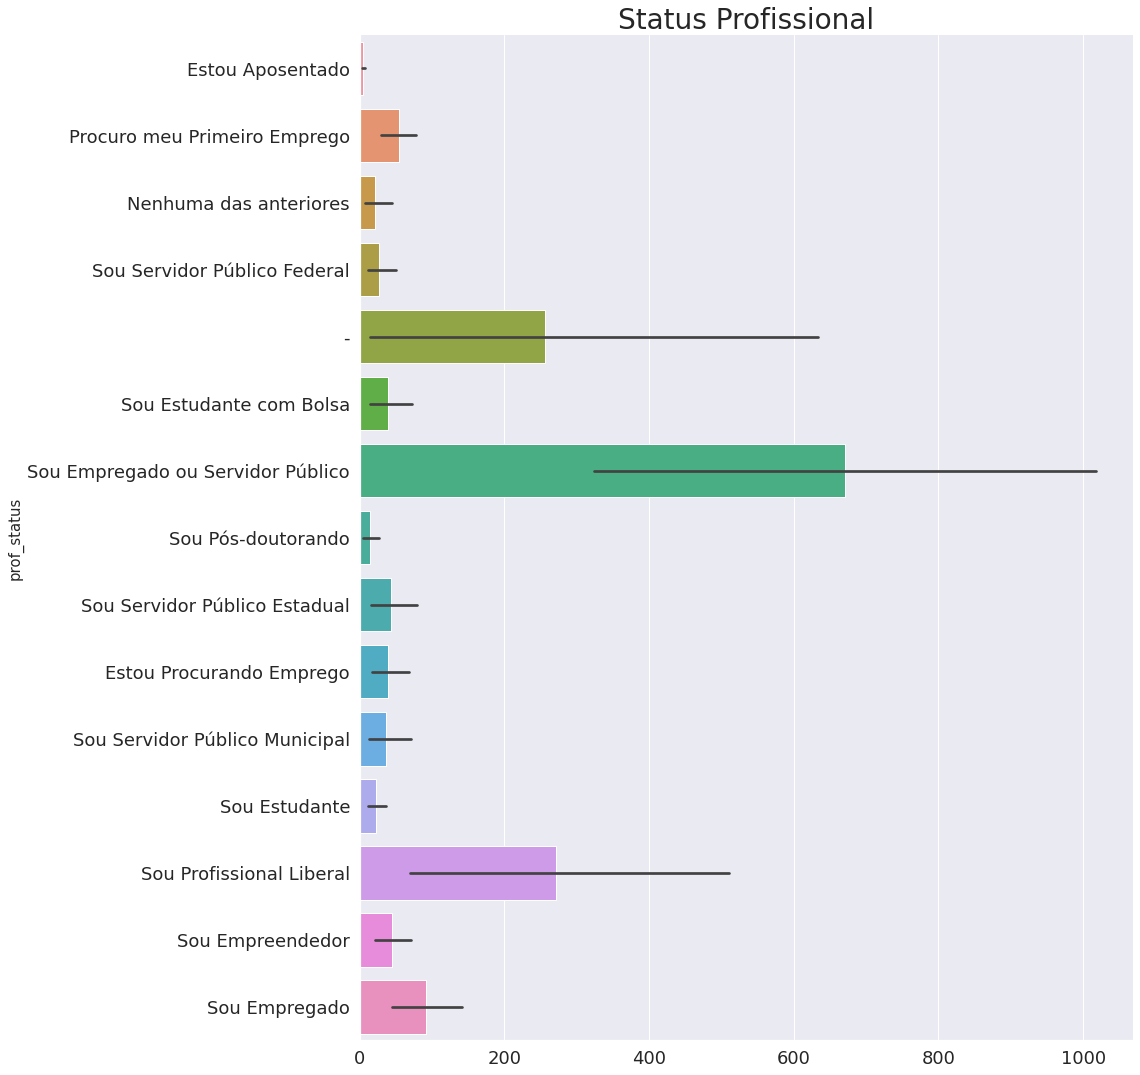

In [125]:
sns.catplot( y="prof_status", x="Record Count", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('Status Profissional', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

#**O sexto DataFrame é: "Área de Atuação"**


In [98]:
dados6 = pd.read_csv("Dashboard Alumni USP_Área de Atuação_Tabela dinâmica.csv")

In [99]:
dados6

,prof_field,Y,Record Count
0,na mesma área de todas minhas formações na USP,2019,210
1,na mesma área de todas minhas formações na USP,2018,261
2,na mesma área da minha Graduação na USP,2017,5
3,na mesma área de todas minhas formações na USP,2016,49
4,-,2017,207
5,em outra área,2020,16
6,na mesma área da minha Pós-Graduação na USP,2017,17
7,-,2016,39
8,em outra área,2018,17
9,na mesma área de todas minhas formações na USP,2017,83


Total de respostas:

In [100]:
dados6['Record Count'].sum()


1642

In [101]:
area_atuacao = pd.DataFrame()
area_atuacao['unidades'] = dados6['prof_field']
area_atuacao['total'] = dados6['Record Count']
area_atuacao = area_atuacao.sort_values(['total'],ascending=False)
area_atuacao

,unidades,total
1,na mesma área de todas minhas formações na USP,261
0,na mesma área de todas minhas formações na USP,210
4,-,207
14,na mesma área da minha Graduação na USP,165
10,na mesma área de todas minhas formações na USP,164
11,na mesma área da minha Pós-Graduação na USP,96
9,na mesma área de todas minhas formações na USP,83
19,na mesma área da minha Graduação na USP,71
3,na mesma área de todas minhas formações na USP,49
12,na mesma área da minha Pós-Graduação na USP,47


In [102]:
area_atuacao = area_atuacao.groupby(['unidades'])['total'].sum().sort_values(ascending=False)
area_atuacao 

unidades
na mesma área de todas minhas formações na USP    791
na mesma área da minha Graduação na USP           258
-                                                 256
na mesma área da minha Pós-Graduação na USP       181
não atuo profissionalmente                         87
em outra área                                      69
Name: total, dtype: int64

In [103]:
area_atuacao = pd.DataFrame(area_atuacao)

In [104]:
area_atu = pd.DataFrame() 
area_atu = area_atu.append(area_atuacao.loc[:])

In [105]:
area_atu.to_excel('area_atuacao.xlsx', sheet_name='Sheet1')

In [106]:
area_atu = pd.read_excel('area_atuacao.xlsx')  

In [107]:
area_atu

,unidades,total
0,na mesma área de todas minhas formações na USP,791
1,na mesma área da minha Graduação na USP,258
2,-,256
3,na mesma área da minha Pós-Graduação na USP,181
4,não atuo profissionalmente,87
5,em outra área,69


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



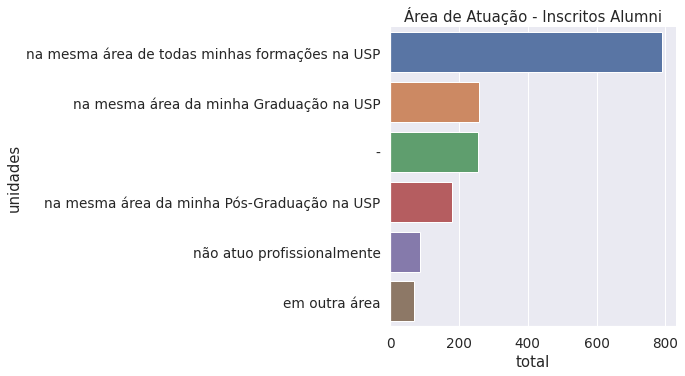

In [108]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= area_atu, y='unidades',x='total', kind="bar")
g.set(title = "Área de Atuação - Inscritos Alumni")

#**O sétimo DataFrame é: " Área de Atuação - por Instituição"**

Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica

In [109]:
dados7 = pd.read_csv("Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica.csv")

In [110]:
dados7

,institution,prof_field,Record Count
0,Faculdade de Odontologia,na mesma área de todas minhas formações na USP,791
1,Faculdade de Odontologia,na mesma área da minha Graduação na USP,258
2,Faculdade de Odontologia,-,256
3,Faculdade de Odontologia,em outra área,69
4,Faculdade de Odontologia,na mesma área da minha Pós-Graduação na USP,181
5,Faculdade de Odontologia,não atuo profissionalmente,87


In [111]:
dados7['prof_field'].unique()

array(['na mesma área de todas minhas formações na USP',
       'na mesma área da minha Graduação na USP', '-', 'em outra área',
       'na mesma área da minha Pós-Graduação na USP',
       'não atuo profissionalmente'], dtype=object)

In [ ]:
mask = dados7['institution'].value_counts().head().index

In [126]:
area_atuacao_intuicao = dados7.groupby(['institution'])['Record Count'].sum().sort_values(ascending=False)
area_atuacao_intuicao 

institution
Faculdade de Odontologia    1642
Name: Record Count, dtype: int64

In [127]:
area_atuacao_intuicao_field = pd.DataFrame()
area_atuacao_intuicao_field['total'] = dados7.groupby(['institution','prof_field'])['Record Count'].sum()
area_atuacao_intuicao_field

total
institution              prof_field                                           
Faculdade de Odontologia -                                                 256
                         em outra área                                      69
                         na mesma área da minha Graduação na USP           258
                         na mesma área da minha Pós-Graduação na USP       181
                         na mesma área de todas minhas formações na USP    791
                         não atuo profissionalmente                         87

Confere!

In [128]:
area_atuacao_2 = dados7.groupby(['prof_field'])['Record Count'].sum().sort_values(ascending=False)
area_atuacao_2

prof_field
na mesma área de todas minhas formações na USP    791
na mesma área da minha Graduação na USP           258
-                                                 256
na mesma área da minha Pós-Graduação na USP       181
não atuo profissionalmente                         87
em outra área                                      69
Name: Record Count, dtype: int64

(-1.1129786013550165,
 1.1006180297154102,
 -1.1135679809131058,
 1.1142580502970656)

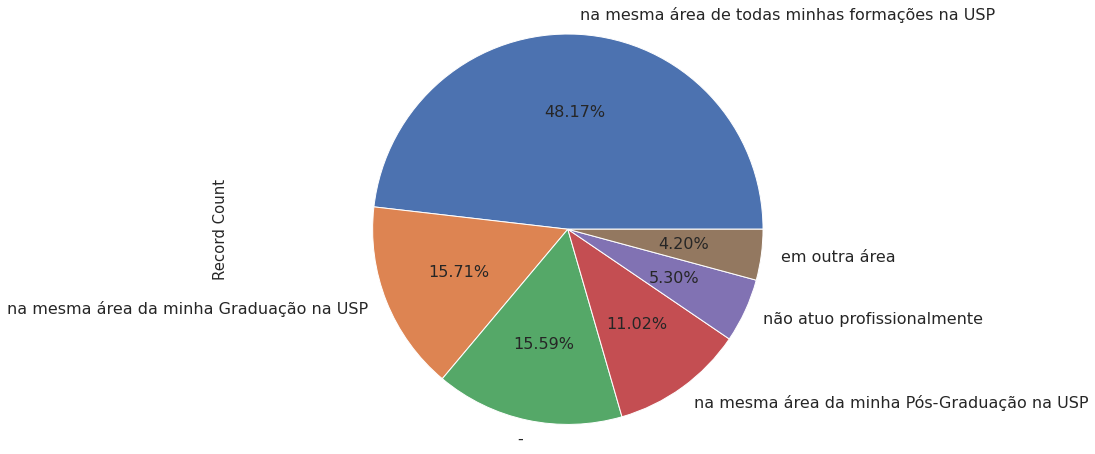

In [129]:
fig = plt.figure(figsize=(12, 8))
area_atuacao_2.plot(kind='pie', autopct='%.2f%%', startangle=0,textprops={'fontsize': 16})
plt.axis('equal') 

#**O oitavo DataFrame é: " Área de Atuação - Empreendedores"**

In [146]:
dados8 = pd.read_csv("Dashboard Alumni USP_Empreendedores_Tabela dinâmica.csv")
dados8

,institution,genre,Record Count
0,Faculdade de Odontologia,Male,18
1,Faculdade de Odontologia,Female,27


In [147]:
empreenda_genre = dados8.groupby(by="genre")['Record Count'].sum().sort_values(ascending=False)

In [148]:
empreenda_genre

genre
Female    27
Male      18
Name: Record Count, dtype: int64

(-1.1138080494567117,
 1.1177383011956805,
 -1.1129928325123302,
 1.1006187477307658)

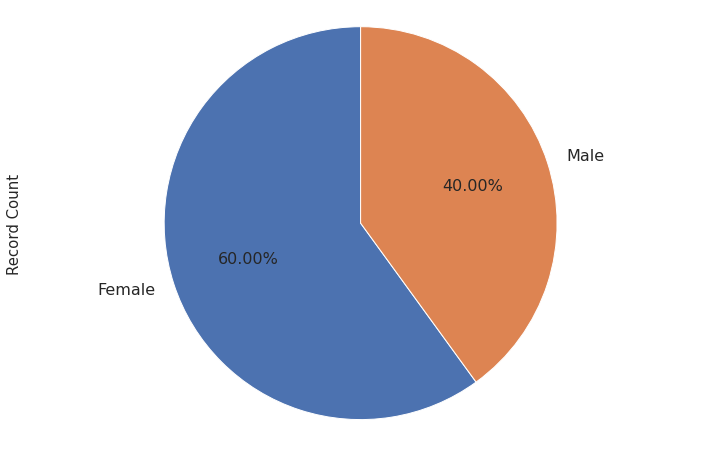

In [149]:
fig = plt.figure(figsize=(12, 8))
empreenda_genre.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [150]:
empreenda = dados8.groupby(by="institution")['Record Count'].sum().sort_values(ascending=False)

In [151]:
empreenda

institution
Faculdade de Odontologia    45
Name: Record Count, dtype: int64

In [152]:
empreenda_ranking = pd.DataFrame()
empreenda_ranking['unidades'] = dados8['institution']
empreenda_ranking['genero'] = dados8['genre']
empreenda_ranking['total'] = dados8['Record Count']
empreenda_ranking = empreenda_ranking.sort_values(['total'],ascending=False)
empreenda_ranking

,unidades,genero,total
1,Faculdade de Odontologia,Female,27
0,Faculdade de Odontologia,Male,18


In [153]:
empreenda_ranking_filtro = pd.DataFrame()
empreenda_ranking_filtro['total'] = empreenda_ranking.groupby(by="unidades", as_index=True)['total'].sum().sort_values(ascending=False)
empreenda_ranking_filtro = empreenda_ranking_filtro[:10]
empreenda_ranking_filtro.reset_index(inplace=True)

In [154]:
empreenda_ranking_filtro

,unidades,total
0,Faculdade de Odontologia,45
